#### Al-Amin
#### Reg. No.: 2020331057
##### Session: 2020-2021
##### Dept. of Computer Science and Engineering, SUST

# Analog to Digital Conversion Using Pulse Code Modulation (PCM)


## 1. Generating an Analog Signal


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sampling_rate = 1000  # Hz
t = np.linspace(0, 1, sampling_rate)
frequency = 5  # Hz
amplitude = 1

# Create the analog signal (sine wave)
analog_signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Visualize the analog signal
plt.figure(figsize=(10, 4))
plt.plot(t, analog_signal, label='Analog Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Analog Signal')
plt.legend()
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

## 2. Sampling the Signal

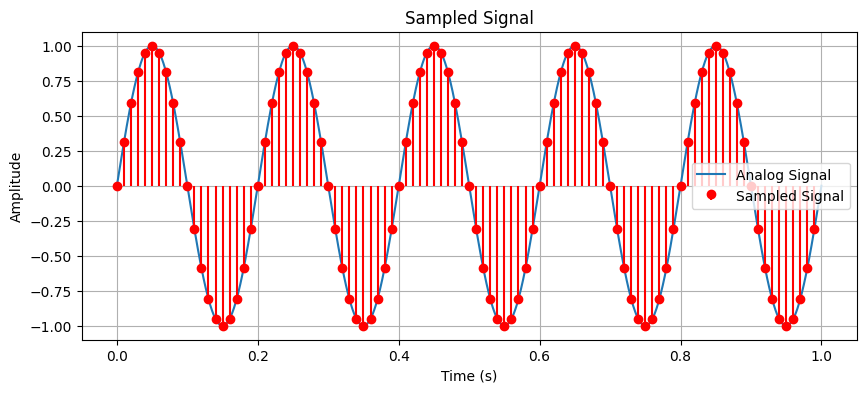

In [ ]:
# Sampling parameters
sampling_interval = 0.01  # seconds (sampling every 10 ms)
sample_times = np.arange(0, 1, sampling_interval)

# Sampled signal
sampled_signal = amplitude * np.sin(2 * np.pi * frequency * sample_times)

# Visualize the sampled signal
plt.figure(figsize=(10, 4))
plt.plot(t, analog_signal, label='Analog Signal')
plt.stem(sample_times, sampled_signal, 'r', markerfmt='ro', basefmt=" ", label='Sampled Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sampled Signal')
plt.legend()
plt.grid(True)
plt.show()

## 3. Quantizing the Signal

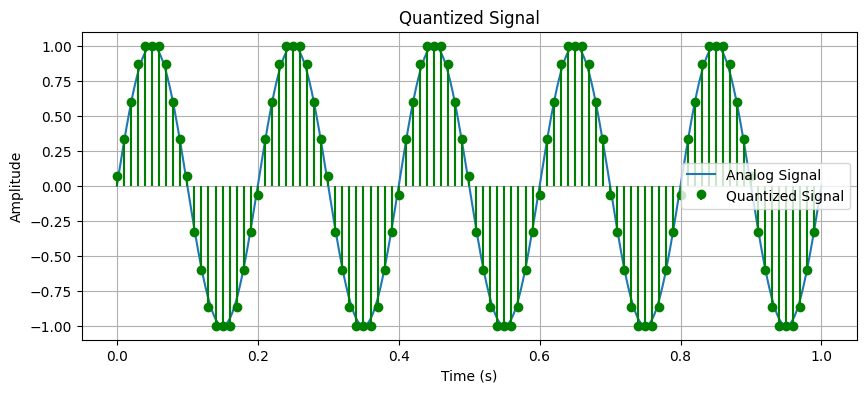

In [ ]:
# Quantization parameters
num_levels = 16  # Number of quantization levels
quantized_signal = np.round((sampled_signal + amplitude) * (num_levels - 1) / (2 * amplitude)) * (2 * amplitude / (num_levels - 1)) - amplitude

# Visualize the quantized signal
plt.figure(figsize=(10, 4))
plt.plot(t, analog_signal, label='Analog Signal')
plt.stem(sample_times, quantized_signal, 'g', markerfmt='go', basefmt=" ", label='Quantized Signal')
plt.xlabel('Time (s
)')
plt.ylabel('Amplitude')
plt.title('Quantized Signal')
plt.legend()
plt.grid(True)
plt.show()

## 4. Encoding the Signal
Next, we encode the quantized signal into a binary format

Time: 0.00s, Sample: 0.07, Encoded: 1000
Time: 0.01s, Sample: 0.33, Encoded: 1010
Time: 0.02s, Sample: 0.60, Encoded: 1100
Time: 0.03s, Sample: 0.87, Encoded: 1110
Time: 0.04s, Sample: 1.00, Encoded: 1111
Time: 0.05s, Sample: 1.00, Encoded: 1111
Time: 0.06s, Sample: 1.00, Encoded: 1111
Time: 0.07s, Sample: 0.87, Encoded: 1110
Time: 0.08s, Sample: 0.60, Encoded: 1100
Time: 0.09s, Sample: 0.33, Encoded: 1010
Time: 0.10s, Sample: 0.07, Encoded: 1000
Time: 0.11s, Sample: -0.33, Encoded: 0101
Time: 0.12s, Sample: -0.60, Encoded: 0011
Time: 0.13s, Sample: -0.87, Encoded: 0000
Time: 0.14s, Sample: -1.00, Encoded: 0000
Time: 0.15s, Sample: -1.00, Encoded: 0000
Time: 0.16s, Sample: -1.00, Encoded: 0000
Time: 0.17s, Sample: -0.87, Encoded: 0000
Time: 0.18s, Sample: -0.60, Encoded: 0011
Time: 0.19s, Sample: -0.33, Encoded: 0101
Time: 0.20s, Sample: -0.07, Encoded: 0111
Time: 0.21s, Sample: 0.33, Encoded: 1010
Time: 0.22s, Sample: 0.60, Encoded: 1100
Time: 0.23s, Sample: 0.87, Encoded: 1110
Time: 

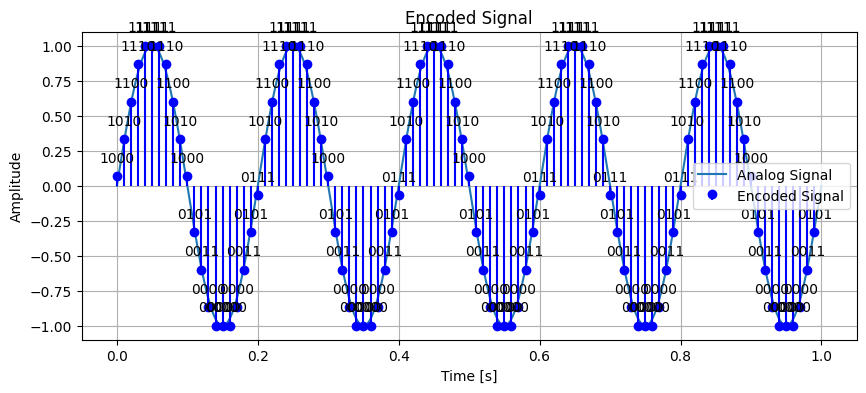

In [ ]:
# Binary encoding function
def binary_encode(value, num_bits):
    value += amplitude  # Shift to positive range
    max_value = 2 * amplitude
    scaled_value = int(value / max_value * (2**num_bits - 1))
    return format(scaled_value, f'0{num_bits}b')

# Encode the quantized signal
num_bits = 4  # Number of bits per sample
encoded_signal = [binary_encode(val, num_bits) for val in quantized_signal]

# Display the encoded signal
for time, sample, encoded in zip(sample_times, quantized_signal, encoded_signal):
    print(f"Time: {time:.2f}s, Sample: {sample:.2f}, Encoded: {encoded}")

# Visualize the encoded signal (binary representation)
plt.figure(figsize=(10, 4))
plt.plot(t, analog_signal, label='Analog Signal')
plt.stem(sample_times, quantized_signal, 'b', markerfmt='bo', basefmt=" ", label='Encoded Signal')
for i, txt in enumerate(encoded_signal):
    plt.annotate(txt, (sample_times[i], quantized_signal[i]), textcoords="offset points", xytext=(0,10), ha='center')
print()
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Encoded Signal')
plt.legend()
plt.grid(True)
plt.show()

## 5. Decoding and Visualizing the Digital Signal

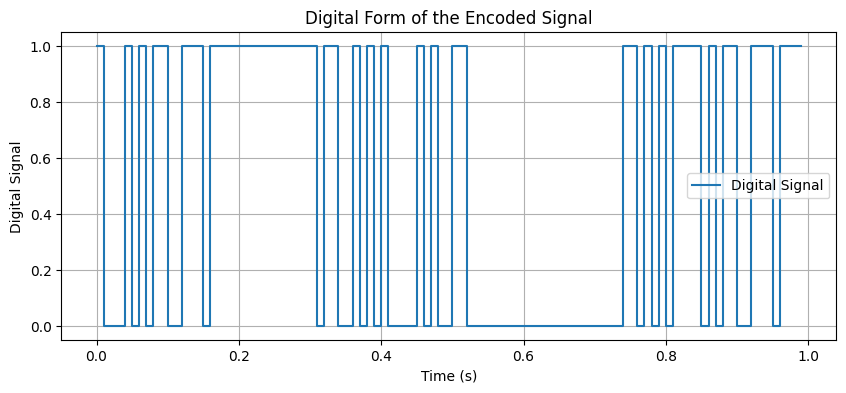

In [ ]:
digital_time = np.repeat(sample_times, num_bits + 1)  # +1 to create steps
digital_signal = []

for encoded in encoded_signal:
    for bit in encoded:
        digital_signal.extend([int(bit)] * (num_bits + 1))

# Trim the digital_signal to the length of digital_time
digital_signal = digital_signal[:len(digital_time)]

# Visualize the digital form of the encoded signal
plt.figure(figsize=(10, 4))
plt.step(digital_time, digital_signal, where='post', label='Digital Signal')
plt.xlabel('Time (s)')
plt.ylabel('Digital Signal')
plt.title('Digital Form of the Encoded Signal')
plt.legend()
plt.grid(True)
plt.show()